**1. Installing and Importing Packages**

In [1]:
!pip3 install thunder-python
!pip3 install matplotlib
!pip3 install showit
!pip3 install tensorflow==2.4
!pip3 install pixellib
!pip3 install tk
!pip3 install Pillow

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
ERROR: black 22.6.0 has requirement typing-extensions>=3.10.0.0; python_version < "3.10", but you'll have typing-extensions 3.7.4.3 which is incompatible.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninstalling typing-extensions-4.3.0:


      Successfully uninstalled typing-extensions-4.3.0


In [2]:

%matplotlib inline
from pyspark import SparkContext, SparkConf
import matplotlib.pyplot as plt
from showit import image,tile
import thunder as td
import numpy as np
from tkinter import *
from matplotlib import pyplot as plt
from PIL import Image, ImageTk

**2. Spark Config**

In [3]:
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
sc

<SparkContext master=local[*] appName=sample_app>

**3. Load "fish" image and "background" image**

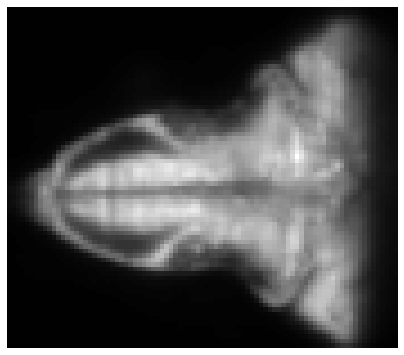

In [4]:
data = td.images.fromexample('fish')
#computingamaximum projection across thezdimension
projections = data.max_projection(axis=0)
sample = image(projections[0]);

In [5]:
projections[0]

Images
mode: local
dtype: uint8
shape: (1, 76, 87)

In [6]:
sample = Image.fromarray(np.uint8( sample.get_cmap()(sample.get_array())*255))
sample.save("fish.png")

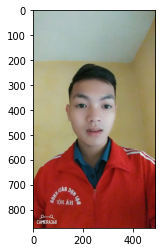

In [7]:
bg = plt.imread("/home/darkhero/background.jpg")
plt.imshow(bg)

**4. Applying background**

In [8]:
from pixellib.tune_bg import alter_bg
import cv2

change_bg=alter_bg()
change_bg.load_pascalvoc_model("/home/darkhero/Downloads/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
output = change_bg.change_bg_img(f_image_path = '/home/darkhero/fish.png',b_image_path = '/home/darkhero/background.jpg')


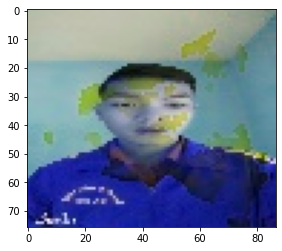

In [9]:
cv2.imwrite("img.jpg", output)
img= cv2.imread("img.jpg")
plt.imshow(img)

**5. Plotting Histogram**

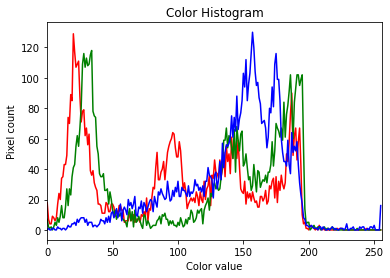

In [10]:
import numpy as np

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()